In [1]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4_3D, ErrorCode
from glob import glob
import numpy as np
from datetime import timedelta
from os import path

import xarray as xr
import matplotlib.pyplot as plt

In [2]:
data_path = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/'
output_path = '/scratch/cpierard/test_1.nc'
ufiles = sorted(glob(data_path+'means/ORCA*U.nc'))
vfiles = sorted(glob(data_path+'means/ORCA*V.nc'))
wfiles = sorted(glob(data_path+'means/ORCA*W.nc'))
mesh_mask = data_path + 'domain/coordinates.nc'


# removes the weird files that don't have date.
ufiles2=[]
vfiles2=[]
wfiles2=[]
for i in range(len(ufiles)):
    if len(ufiles[i].split('_')[2])>11:
        ufiles2.append(ufiles[i])
        
for i in range(len(vfiles)):
    if len(vfiles[i].split('_')[2])>11:
        vfiles2.append(vfiles[i])

for i in range(len(wfiles)):
    if len(wfiles[i].split('_')[2])>11:
        wfiles2.append(wfiles[i])


In [3]:
filenames = {'U': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': ufiles2},
             'V': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': vfiles2},
             'W': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': wfiles2}}

variables = {'U': 'uo',
             'V': 'vo',
             'W': 'wo'}
dimensions = {'U': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'},
              'V': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'},
              'W': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'}}

indices = {'lat': range(500, 1400), 'lon': range(2500, 3800)}

In [4]:
200/230

0.8695652173913043

In [5]:
fieldset = FieldSet.from_nemo(filenames, variables, dimensions,
                             allow_time_extrapolation=True, indices=indices)

         It will be opened with no decoding. Filling values might be wrongly parsed.
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
 

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pytho

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/pyt

In [10]:
n_points = 1000
lon_cluster = [0.35]*n_points
lat_cluster = [-38.13]*n_points
depth_cluster = [1]*n_points
lon_cluster = np.array(lon_cluster)+(np.random.random(len(lon_cluster))-0.5)/24


In [11]:
pset = ParticleSet.from_list(fieldset=fieldset, pclass=JITParticle,
                             lon=lon_cluster,
                             lat=lat_cluster,
                             depth=depth_cluster)

In [13]:
def delete_particle(particle, fieldset, time):
    particle.delete()

In [14]:
kernels = pset.Kernel(AdvectionRK4_3D)

In [16]:
kernels = pset.Kernel(AdvectionRK4_3D)

# Output file
output_file = pset.ParticleFile(name=output_path,
                                outputdt=timedelta(hours=1))

pset.execute(kernels,
             output_file=output_file,
             runtime=timedelta(days=10),
             dt=timedelta(hours=1),
            recovery={ErrorCode.ErrorOutOfBounds: delete_particle})

output_file.close()


INFO: Compiled ArrayJITParticleAdvectionRK4_3D ==> /tmp/parcels-263482/lib4c7e6f404a235025a3585f60cd7b99f1_0.so
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/nethome/6525954/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, dec

In [20]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [17]:
particles = xr.load_dataset('/scratch/cpierard/test_1.nc')

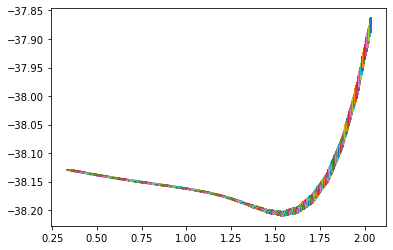

In [19]:
plt.plot(particles['lon'][:], particles['lat'][:]);

In [40]:
%matplotlib inline

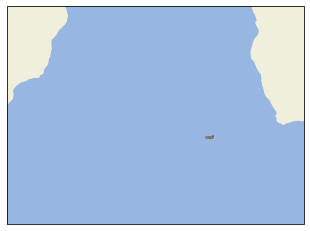

In [43]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-50, 25, -60, -5), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
# # ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.RIVERS)

ax.plot(particles['lon'][:], particles['lat'][:]);
# t = 24

# for j,n in enumerate(range(0, 1000000, 100000)):
#     #print(i, i+1000000, particles['lat'][i,0].values, particles['lon'][i,0].values)
#     m = n+100000
#     ax.scatter(particles['lon'][:,t], particles['lat'][:,t], s=0.01);

In [22]:
particles

<xarray.Dataset>
Dimensions:     (obs: 241, traj: 1)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 10.0 10.0 10.0 10.0 ... 10.0 10.0 10.0 10.0
    time        (traj, obs) datetime64[ns] 2000-01-03T12:00:00 ... 2000-01-13...
    lat         (traj, obs) float64 -38.13 -38.13 -38.13 ... -37.88 -37.88
    lon         (traj, obs) float64 0.35 0.3629 0.3758 ... 2.025 2.03 2.035
    z           (traj, obs) float64 1.0 0.999 0.9981 ... 0.9308 0.9279 0.9251
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

In [2]:
pkl.load('../data/NIOZ_sampling_locations.pkl')

TypeError: file must have 'read' and 'readline' attributes